### ****Run Biclustering****

In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import sys
import os
from sklearn.cluster import SpectralCoclustering
import json

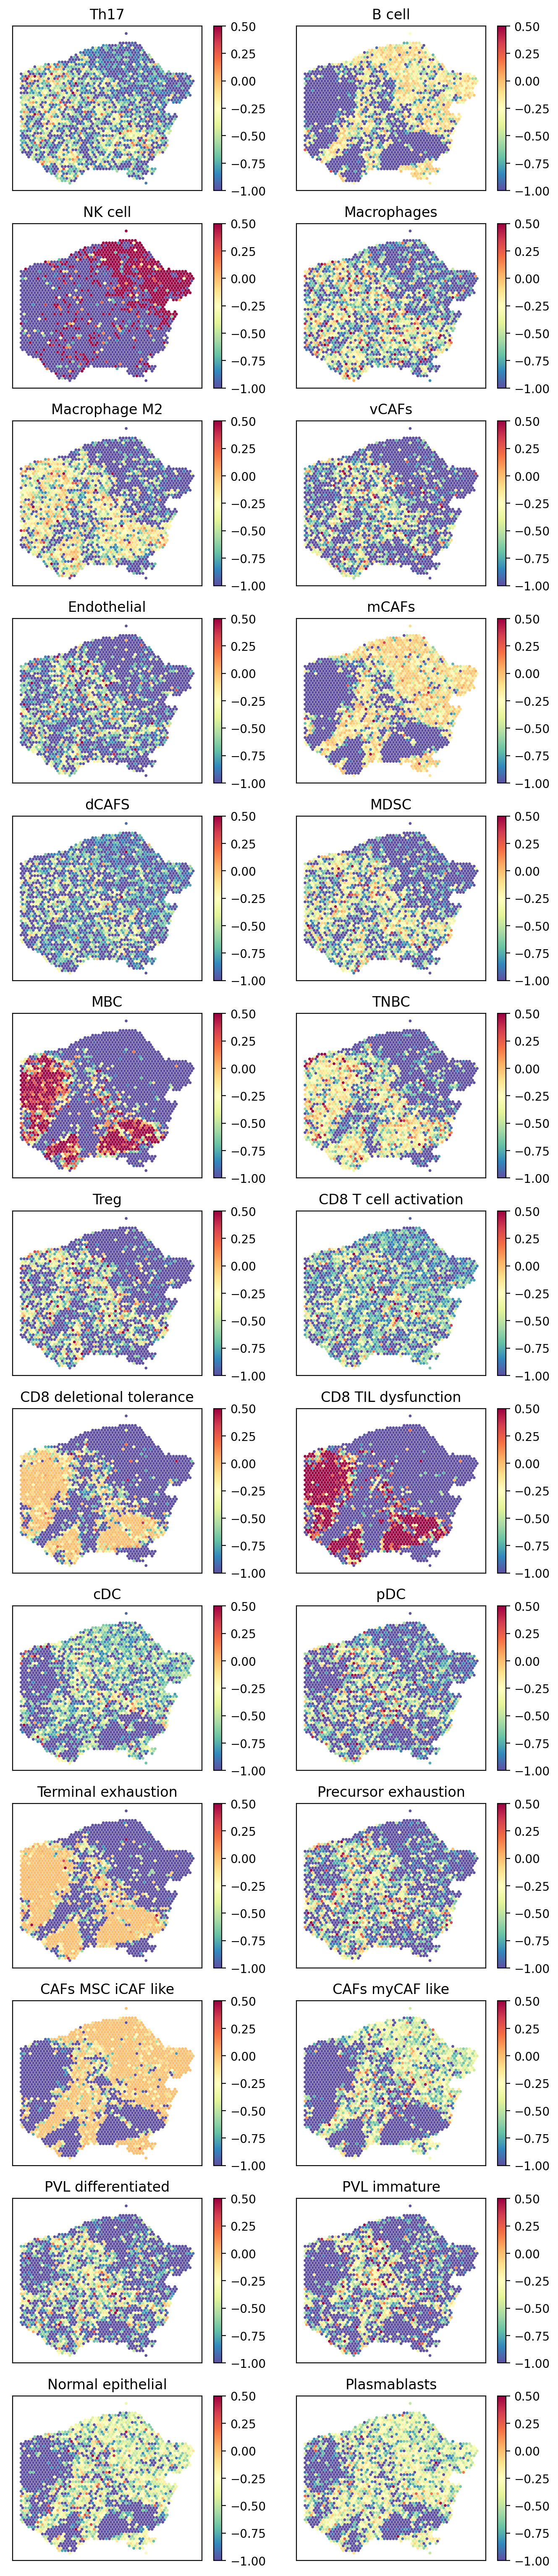

In [2]:
sample_ids = ['MBC_1A']

for sample_id in sample_ids:
    
    
    map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
    
    mu_poe_stack_df = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file.csv')
    mu_poe_stack_df.index = mu_poe_stack_df.iloc[:,0]
    mu_poe_stack_df = mu_poe_stack_df.drop(mu_poe_stack_df.columns[0], axis=1)
    
    c_max = 0.5
    c_min = -1

    image_slide_z = 0

    #all_spot = mu_poe_stack_df[[spot_id.split('-')[-1]==sample_ids[image_slide_z]for spot_id in mu_poe_stack_df.index ]]
    all_spot = mu_poe_stack_df
    
    all_loc = np.array(map_info.loc[map_info['sample']==sample_id,['array_col','array_row']])

    fig,axs= plt.subplots(13,2,figsize=(8,40),dpi=200)
    for i in range(13):
        for j in range(2):
            plotted_cell_idx = i*2+j
            if plotted_cell_idx<mu_poe_stack_df.shape[1]:
                plotted_cell= mu_poe_stack_df.columns[plotted_cell_idx]
                ax=axs[i,j]
                g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=all_spot.loc[:,plotted_cell],cmap='Spectral_r',
                             vmin=c_min, vmax=c_max
                            )
                plt.colorbar(g, ax=ax)
                ax.set_title(plotted_cell)
                ax.set_xticks([])
                ax.set_yticks([]) 

[]

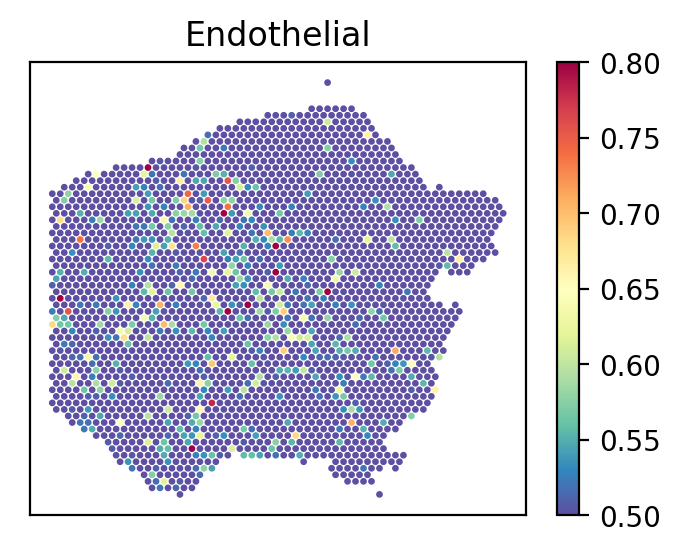

In [3]:
all_spot_norm = (all_spot-all_spot.min())/(all_spot.max()-all_spot.min())

fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)
idx = 6
g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=all_spot_norm.iloc[:,idx],cmap='Spectral_r',
                             vmin=0.5, vmax=0.8
                            )
plt.colorbar(g, ax=ax)
ax.set_title(all_spot.columns[idx])
ax.set_xticks([])
ax.set_yticks([]) 

[]

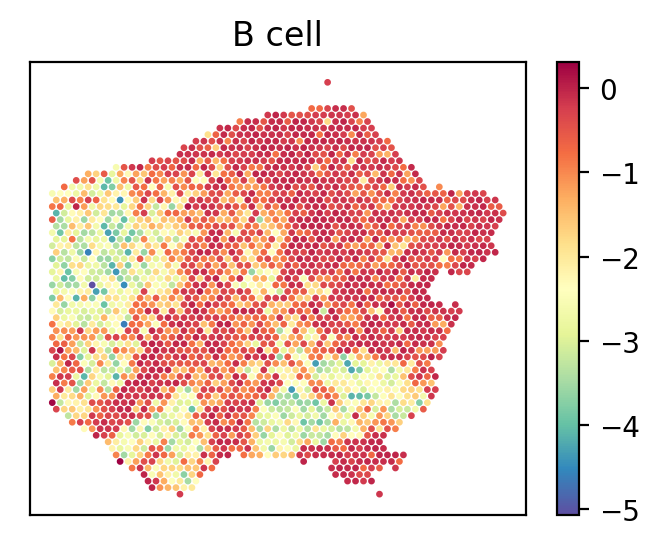

In [4]:
fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)
idx = 1
g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=all_spot.iloc[:,idx],cmap='Spectral_r',
                             #vmin=c_min, vmax=c_max
                            )
plt.colorbar(g, ax=ax)
ax.set_title(all_spot.columns[idx])
ax.set_xticks([])
ax.set_yticks([]) 

[]

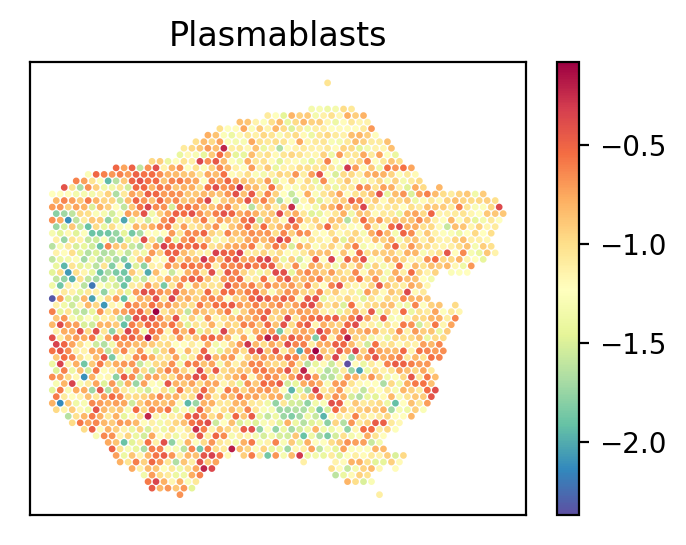

In [5]:
fig,ax= plt.subplots(1,1,figsize=(4,3),dpi=200)

g=ax.scatter(all_loc[:,0],-all_loc[:,1],s=2,c=all_spot.mean(axis=1),cmap='Spectral_r',
                             #vmin=c_min, vmax=c_max
                            )
plt.colorbar(g, ax=ax)
ax.set_title(plotted_cell)
ax.set_xticks([])
ax.set_yticks([]) 

In [6]:
factor_all = pd.DataFrame()
#map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
for sample_id in sample_ids:
    factor = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file.csv',index_col=0)
    factor.index = factor.index+'-'+sample_id
    factor = (factor-factor.min())/(factor.max()-factor.min())
    factor_all = factor_all.append(factor)

In [7]:
factor_subset = factor_all[[t.split('-')[2]=='MBC_1A' for t in factor_all.index]]

(array([  3.,  22.,  82., 135., 210., 192., 227., 309., 587., 687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

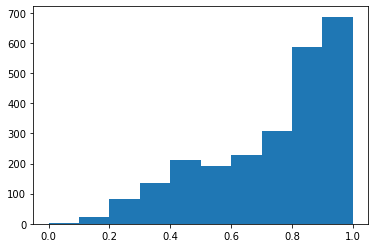

In [8]:
plt.hist(factor_subset['B cell'])

(array([  3.,  22.,  82., 135., 210., 192., 227., 309., 587., 687.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

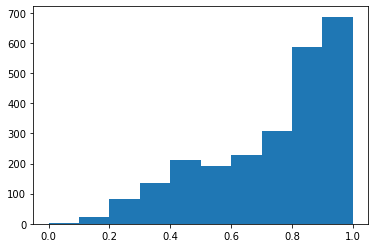

In [9]:
plt.hist(factor_all['B cell'])

In [10]:
factor_subset

Th17    B cell   NK cell  Macrophages  \
AAACACCAATAACTGC-1-MBC_1A  0.569927  0.925716  0.533838     0.381103   
AAACAGCTTTCAGAAG-1-MBC_1A  0.665945  0.364713  0.204294     0.344064   
AAACAGGGTCTATATT-1-MBC_1A  0.458818  0.208300  0.357592     0.186431   
AAACATGGTGAGAGGA-1-MBC_1A  0.591837  0.991435  0.338356     0.194377   
AAACCGGGTAGGTACC-1-MBC_1A  0.499608  0.461341  0.597271     0.445366   
...                             ...       ...       ...          ...   
TTGTTCAGTGTGCTAC-1-MBC_1A  0.548656  0.939765  0.599296     0.337232   
TTGTTGTGTGTCAAGA-1-MBC_1A  0.523758  0.920983  0.768397     0.388022   
TTGTTTCACATCCAGG-1-MBC_1A  0.491252  0.887307  0.413479     0.282634   
TTGTTTCATTAGTCTA-1-MBC_1A  0.408107  0.791233  0.325076     0.233640   
TTGTTTCCATACAACT-1-MBC_1A  0.664712  0.563510  0.246596     0.544480   

                           Macrophage M2     vCAFs  Endothelial     mCAFs  \
AAACACCAATAACTGC-1-MBC_1A       0.662129  0.345977     0.337649  0.862762   
AAACAGCTTTCAGAAG-1-MBC_1A       0.616148  0.313586     0.383218  0.362303   
AAACAGGGTCTATATT-1-MBC_1A       0.366168  0.276636     0.175360  0.247086   
AAACATGGTGAGAGGA-1-MBC_1A       0.464461  0.647561     0.402539  0.892667   
AAACCGGGTAGGTACC-1-MBC_1A       0.687598  0.451520     0.481460  0.268631   
...                                  ...       ...          ...       ...   
TTGTTCAGTGTGCTAC-1-MBC_1A       0.336086  0.264492     0.215249  0.930878   
TTGTTGTGTGTCAAGA-1-MBC_1A       0.564185  0.505887     0.387576  0.911806   
TTGTTTCACATCCAGG-1-MBC_1A       0.392496  0.471265     0.365757  0.912196   
TTGTTTCATTAGTCTA-1-MBC_1A       0.257819  0.361624     0.225243  0.925198   
TTGTTTCCATACAACT-1-MBC_1A       0.719055  0.622458     0.468861  0.701675   

                              dCAFS      MDSC  ...       cDC       pDC  \
AAACACCAATAACTGC-1-MBC_1A  0.655697  0.662629  ...  0.638528  0.525336   
AAACAGCTTTCAGAAG-1-MBC_1A  0.715467  0.524332  ...  0.476553  0.240194   
AAACAGGGTCTATATT-1-MBC_1A  0.205425  0.349745  ...  0.305052  0.306753   
AAACATGGTGAGAGGA-1-MBC_1A  0.683735  0.421877  ...  0.589990  0.523432   
AAACCGGGTAGGTACC-1-MBC_1A  0.306881  0.682904  ...  0.234379  0.324260   
...                             ...       ...  ...       ...       ...   
TTGTTCAGTGTGCTAC-1-MBC_1A  0.521308  0.457372  ...  0.706089  0.478747   
TTGTTGTGTGTCAAGA-1-MBC_1A  0.644020  0.583504  ...  0.658964  0.553364   
TTGTTTCACATCCAGG-1-MBC_1A  0.424398  0.494022  ...  0.669231  0.633226   
TTGTTTCATTAGTCTA-1-MBC_1A  0.584303  0.283654  ...  0.470226  0.387392   
TTGTTTCCATACAACT-1-MBC_1A  0.661552  0.753189  ...  0.602359  0.498779   

                           Terminal exhaustion  Precursor exhaustion  \
AAACACCAATAACTGC-1-MBC_1A             0.459862              0.322319   
AAACAGCTTTCAGAAG-1-MBC_1A             0.803297              0.212224   
AAACAGGGTCTATATT-1-MBC_1A             0.803328              0.182937   
AAACATGGTGAGAGGA-1-MBC_1A             0.647407              0.683574   
AAACCGGGTAGGTACC-1-MBC_1A             0.803595              0.499320   
...                                        ...                   ...   
TTGTTCAGTGTGCTAC-1-MBC_1A             0.122849              0.275620   
TTGTTGTGTGTCAAGA-1-MBC_1A             0.508790              0.340040   
TTGTTTCACATCCAGG-1-MBC_1A             0.230034              0.427135   
TTGTTTCATTAGTCTA-1-MBC_1A             0.323306              0.581845   
TTGTTTCCATACAACT-1-MBC_1A             0.803327              0.695680   

                           CAFs MSC iCAF like  CAFs myCAF like  \
AAACACCAATAACTGC-1-MBC_1A            0.941223         0.835702   
AAACAGCTTTCAGAAG-1-MBC_1A            0.180642         0.381741   
AAACAGGGTCTATATT-1-MBC_1A            0.158144         0.187760   
AAACATGGTGAGAGGA-1-MBC_1A            0.893149         0.784307   
AAACCGGGTAGGTACC-1-MBC_1A            0.426473         0.440276   
...                                       ...              ...   
TTGTTCAGTGTGCTAC-1-MBC_1A

In [11]:
# bi-clustering
#slisa_a = pd.read_csv('../results/hubs/all_slisa_tumors.csv',index_col=0)

## Bicluster

In [12]:
from scipy.stats import zscore

def bi_cluster(slisa_a):
    model = SpectralCoclustering(n_clusters=11, random_state=0)
    model.fit(slisa_a)
    fit_data = slisa_a.iloc[np.argsort(model.row_labels_)]
    fit_data = fit_data[fit_data.columns[np.argsort(model.column_labels_)]]
    return fit_data,model

In [31]:
sample_ids = [
             'MBC_1A',
             'MBC_1B',
             'MBC_2A',
             'MBC_2B',
             'MBC_3A',
             'MBC_3B',
             'MBC_4A',
             'MBC_4B',
             'CID4465',
             'CID444971',
             '1142243F',
             '1160920F'
            ]

In [47]:
zscore(factor,axis=None)

(2454, 26)

In [56]:
factor_all = pd.DataFrame()
#sample_ids = ['CID444971']
#map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
for sample_id in sample_ids:
    factor = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file.csv',index_col=0)
    factor.index = factor.index+'-'+sample_id
    #factor_norm = zscore(factor,axis=None)
    #factor_norm = pd.DataFrame(factor_norm,index= factor.index, columns=factor.columns)
    #factor = (factor.T.apply(zscore)).T

    #factor = np.clip(factor, -1, 2)
                
    #factor = (factor-factor.min())/(factor.max()-factor.min())
    #factor_all = factor_all.append(factor_norm)
    factor_all = factor_all.append(factor)
    
#fit_data,model = bi_cluster(factor_all.T.apply(zscore).T)
#factor_all = (factor_all.T.apply(zscore)).T
#factor_all  = (factor_all.apply(zscore))
fit_data,model = bi_cluster(factor_all)

factor_all.to_csv('../results/03_hubs/'+'PoE_alltumors_factor.csv')
fit_data.to_csv('../results/03_hubs/'+'PoE_alltumors_bicluster.csv')
row_order_df = pd.DataFrame({'id':factor_all.index,'cluster':model.row_labels_})
row_order_df.index = row_order_df.loc[:,'id']
col_order_df = pd.DataFrame({'id':factor_all.columns,'cluster':model.column_labels_})
col_order_df.to_csv('../results/03_hubs/'+'PoE_alltumors_bicluster_res_col_orders_individual.csv')
row_order_df.to_csv('../results/03_hubs/'+'PoE_alltumors_bicluster_res_row_orders_individual.csv')

In [43]:
factor

Th17    B cell   NK cell  Macrophages  \
AAACACCAATAACTGC-1-MBC_1A  0.213972  0.212873  0.162727     0.256398   
AAACAGCTTTCAGAAG-1-MBC_1A  0.226293  0.052481 -0.293830    -0.290253   
AAACAGGGTCTATATT-1-MBC_1A  0.133275 -0.215386 -0.315153     0.189397   
AAACATGGTGAGAGGA-1-MBC_1A  0.109657 -0.155322  0.035958     0.250651   
AAACCGGGTAGGTACC-1-MBC_1A  0.208507 -0.369011  0.002457     0.375446   
...                             ...       ...       ...          ...   
TTGTTCAGTGTGCTAC-1-MBC_1A -0.324179  0.487597  0.697243    -0.005632   
TTGTTGTGTGTCAAGA-1-MBC_1A -0.473642  1.333224  0.734775    -0.304228   
TTGTTTCACATCCAGG-1-MBC_1A  0.028850  0.132537  0.094809     0.259765   
TTGTTTCATTAGTCTA-1-MBC_1A  0.197915  0.073705  0.016100     0.052665   
TTGTTTCCATACAACT-1-MBC_1A  0.135048 -0.133283 -0.021477     0.401319   

                           Macrophage M2     vCAFs  Endothelial     mCAFs  \
AAACACCAATAACTGC-1-MBC_1A       0.850972  0.328806     0.375807  1.089689   
AAACAGCTTTCAGAAG-1-MBC_1A       0.263660  0.188282     0.222668  0.293989   
AAACAGGGTCTATATT-1-MBC_1A       0.335093  0.030407     0.081277  0.339790   
AAACATGGTGAGAGGA-1-MBC_1A       0.258147  0.369192     0.360928  1.203986   
AAACCGGGTAGGTACC-1-MBC_1A       0.274577  0.764428    -0.060729  0.148675   
...                                  ...       ...          ...       ...   
TTGTTCAGTGTGCTAC-1-MBC_1A      -0.407754 -0.195373    -0.188475  0.526343   
TTGTTGTGTGTCAAGA-1-MBC_1A       0.034986 -0.755738    -0.242655  0.129713   
TTGTTTCACATCCAGG-1-MBC_1A       0.329747  0.070460     0.262250  1.609777   
TTGTTTCATTAGTCTA-1-MBC_1A      -0.037895 -0.175307     0.560668  1.606195   
TTGTTTCCATACAACT-1-MBC_1A       0.644294  0.336742     0.261263  0.174495   

                              dCAFS      MDSC  ...       cDC       pDC  \
AAACACCAATAACTGC-1-MBC_1A  0.311954  0.439331  ...  0.128440  0.434983   
AAACAGCTTTCAGAAG-1-MBC_1A -0.324894 -0.074525  ... -0.099324  0.001175   
AAACAGGGTCTATATT-1-MBC_1A -0.019089 -0.017763  ... -0.143180 -0.011006   
AAACATGGTGAGAGGA-1-MBC_1A -0.143512  0.052784  ...  0.107707  0.203359   
AAACCGGGTAGGTACC-1-MBC_1A -0.349563 -0.011987  ... -0.002679  0.000882   
...                             ...       ...  ...       ...       ...   
TTGTTCAGTGTGCTAC-1-MBC_1A  0.612845  0.145827  ... -0.227622 -0.303436   
TTGTTGTGTGTCAAGA-1-MBC_1A  0.258864 -0.064550  ... -0.054689 -0.238561   
TTGTTTCACATCCAGG-1-MBC_1A  0.034889  0.167755  ...  0.047265  0.106359   
TTGTTTCATTAGTCTA-1-MBC_1A -0.041983  0.274935  ...  0.044617  0.170676   
TTGTTTCCATACAACT-1-MBC_1A  0.049021  0.237021  ...  0.224894  0.654648   

                           Terminal exhaustion  Precursor exhaustion  \
AAACACCAATAACTGC-1-MBC_1A            -0.026260             -0.052012   
AAACAGCTTTCAGAAG-1-MBC_1A             0.431786              0.309555   
AAACAGGGTCTATATT-1-MBC_1A             0.443892              0.270968   
AAACATGGTGAGAGGA-1-MBC_1A             0.255379              0.432619   
AAACCGGGTAGGTACC-1-MBC_1A            -0.066500              0.341752   
...                                        ...                   ...   
TTGTTCAGTGTGCTAC-1-MBC_1A            -0.435285             -0.122719   
TTGTTGTGTGTCAAGA-1-MBC_1A             0.071517              0.018578   
TTGTTTCACATCCAGG-1-MBC_1A             0.236153              0.481568   
TTGTTTCATTAGTCTA-1-MBC_1A             0.311847              0.242027   
TTGTTTCCATACAACT-1-MBC_1A             0.401961              0.375392   

                           CAFs MSC iCAF like  CAFs myCAF like  \
AAACACCAATAACTGC-1-MBC_1A            1.179006         1.381535   
AAACAGCTTTCAGAAG-1-MBC_1A            0.554008         0.791183   
AAACAGGGTCTATATT-1-MBC_1A            0.140195         0.584204   
AAACATGGTGAGAGGA-1-MBC_1A            0.888789         1.898586   
AAACCGGGTAGGTACC-1-MBC_1A            0.385787         0.821052   
...                                       ...              ...   
TTGTTCAGTGTGCTAC-1-MBC_1A

In [53]:
factor_all = pd.DataFrame()
#sample_ids = ['CID444971']
#map_info = pd.read_csv("../results/02_PoE_factor/"+sample_id+'map_info.csv')
for sample_id in sample_ids:
    factor = pd.read_csv("../results/02_PoE_factor/"+sample_id+'nb_file2.csv',index_col=0)
    factor.index = factor.index+'-'+sample_id
    
    factor_norm = zscore(factor,axis=None)
    factor_norm = pd.DataFrame(factor_norm,index= factor.index, columns=factor.columns)
    
    
    #factor = (factor.apply(zscore))
    #factor = (factor.T.apply(zscore)).T

    #factor = np.clip(factor, -1, 2)
                
    #factor = (factor-factor.min())/(factor.max()-factor.min())
    factor_all = factor_all.append(factor_norm)
    

#factor_all  = (factor_all.T.apply(zscore)).T
#factor_all  = (factor_all.apply(zscore))
#factor_all = (factor_all.T.apply(zscore)).T
#fit_data,model = bi_cluster(factor_all.T.apply(zscore).T)
fit_data,model = bi_cluster(factor_all)

factor_all.to_csv('../results/03_hubs/'+'RNA_alltumors_factor.csv')
fit_data.to_csv('../results/03_hubs/'+'RNA_alltumors_bicluster.csv')
row_order_df = pd.DataFrame({'id':factor_all.index,'cluster':model.row_labels_})
row_order_df.index = row_order_df.loc[:,'id']
col_order_df = pd.DataFrame({'id':factor_all.columns,'cluster':model.column_labels_})
col_order_df.to_csv('../results/03_hubs/'+'RNA_alltumors_bicluster_res_col_orders_individual.csv')
row_order_df.to_csv('../results/03_hubs/'+'RNA_alltumors_bicluster_res_row_orders_individual.csv')

In [17]:
for sample_id in sample_ids:
    print('working on ...',sample_id)
    slisa_a_cut = factor_all.loc[[i.endswith(sample_id) for i in factor_all.index],:]
    fit_data_cut,model_cut = bi_cluster(slisa_a_cut)
    fit_data_cut.to_csv('../results/03_hubs/'+sample_id+'_bicluster_res_individual.csv')
    row_order_df = pd.DataFrame({'id':slisa_a_cut.index,'cluster':model_cut.row_labels_})
    row_order_df.index = row_order_df.loc[:,'id']
    col_order_df = pd.DataFrame({'id':slisa_a_cut.columns,'cluster':model_cut.column_labels_})
    col_order_df.to_csv('../results/03_hubs/'+sample_id+'_bicluster_res_col_orders_individual.csv')
    row_order_df.to_csv('../results/03_hubs/'+sample_id+'_bicluster_res_row_orders_individual.csv')

working on ... MBC_1A
working on ... MBC_1B
working on ... CID444971
